In [1]:
#예시
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("./concrete.csv", sep=",", header=0)
data

def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

feture_scaling(data,column=["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"])
data.head

# Neural Network

x_data = data[["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]]
print(x_data.shape)
y_data = data[["strength"]]
print(y_data.shape)

num_node = 10
num_layer = 2
learn_rate = 0.01

W_ = []
b_ = []
layer_ = []

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([8,num_node]), name='weight')
b1 = tf.Variable(tf.random_normal([num_node]), name='bias')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W_.append(W1)
b_.append(b1)
layer_.append(layer1)

for i in range(1, num_layer):
    W_.append(tf.Variable(tf.random_normal([num_node,num_node]), name='weight'))
    b_.append(tf.Variable(tf.random_normal([num_node]), name='bias'))
    layer_.append(tf.sigmoid(tf.matmul(layer_[i-1], W_[i]) + b_[i]))

W_last = tf.Variable(tf.random_normal([num_node,1]), name='weight')
b_last = tf.Variable(tf.random_normal([1]), name='bias')

Y_hat = tf.sigmoid(tf.matmul(layer_[-1], W_last) + b_last)
loss = tf.reduce_mean(tf.square(Y - Y_hat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_history = []
    for step in range(10001):
        cost_val, hypothesis, _ = sess.run([loss, Y_hat, train], feed_dict={X:x_data, Y:y_data}) # ì—°ì‚°ê·¸ëž˜í”„ ì‹¤í–‰í•  ë•Œ ë³€ìˆ˜ ê°’ì„ ë„£ìŒ
        cost_history.append(cost_val)
        if step % 2000 == 0:
            print(step, cost_val)
    plt.plot(cost_history)
    plt.show()

    pred = sess.run(Y_hat, feed_dict={X:x_data})
    print(np.cov(np.array(y_data).reshape(-1), np.array(pred).reshape))
#result
# (1030, 8)
# (1030, 1)
# 0 0.3000054
# 2000 0.04737836
# 4000 0.04028104
# 6000 0.03553781
# 8000 0.03276191
# 10000 0.030917015

SyntaxError: invalid syntax (<ipython-input-1-b37328c5bd0e>, line 77)

분산이 작을수록 평균값(예측값)과 가까움  
공분산 covariance  
공분산 값이 커지면 분산도 커지고... cov  
공분산이 작을수록 예측값과 분산이 가까워짐  
minmax normalization (0,1)사이 구간 (마이너스가 의미가 없음/약해짐->(-)또한 0~1사이 구간으로 옮겨지기 때문)  
z- score standardization 마이너스가 의미가 있는 데이터 (입/출, 방향, 재무구조 등)  

ML은 정규화가 필수  
z-score standardization  


In [36]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [37]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

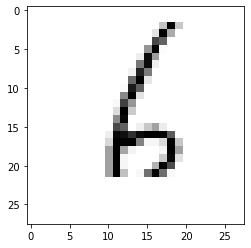

In [55]:
import matplotlib.pyplot as plt

#images <실제적 데이터, y<label
#data 28x28 
#accuracy ~ test data : mnist.test.images[i]
#softmax& NN
print(mnist.train.images[0])

for i in range(5):
    print(mnist.train.labels[i])
    print(np.where(mnist.train.labels[i] == 1))
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap = 'Greys')
#     plt.show()

In [39]:
x_data = mnist.train.images
y_data = mnist.train.labels
print(x_data.shape)
print(y_data.shape)

(55000, 784)
(55000, 10)


In [47]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None,784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.int32, [None,10])

W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))


# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# batch는 전체 데이터 중 몇 개의 덩어리로 나눈 개념으로 이해하면 된다.
#batch를 쓰는 이유는 전체 데이터의 양이 많기 때문이다-55000개
batch_size = 100
# print(mnist.train.num_examples)
num_iterations = int(mnist.train.num_examples / batch_size)


In [50]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
#         if step % 200 == 0:
#             loss, acc = sess.run([cost, accuracy], feed_dict={X:x_data, Y:y_data})
#             print(step, loss, acc)
    
    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
    
    
#     pred = sess.run(prediction, feed_dict={X:x_data})
#     for p, y in zip(pred, y_data.flatten()):
#         print("{} Prediction: {} True Y: {}".format(p==int(y), p, int(y)))




with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()


TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type int32 of argument 'x'.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.950021532
Epoch: 0002, Cost: 1.107064487
Epoch: 0003, Cost: 0.879222766
Epoch: 0004, Cost: 0.769486040
Epoch: 0005, Cost: 0.701486585
Epoch: 0006, Cost: 0.653282802
Epoch: 0007, Cost: 0.616952358
Epoch: 0008, Cost: 0.587771500
Epoch: 0009, Cost: 0.563679084
Epoch: 0010, Cost: 0.543365884
Epoch: 0011, Cost: 0.525753920
Epoch: 0012, Cost: 0.510236868
Epoch: 0013, Cost: 0.497128075
Epoch: 0014, Cost: 0.485540515
Epoch: 0015, Cost: 0.474336218
Learning finished
Accuracy:  0.8876
Label:  [6]
Prediction:  [6]


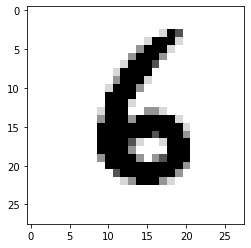

In [43]:
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()



# solution-use AdamOptimizer


In [58]:
learning_rate = 0.001
training_epochs = 15 #epochs DL 용어
batch_size = 100

X = tf.placeholder(tf.float32,[None,784]) #image (28x28) ->일렬로 784 한번에 받아들이기
Y = tf.placeholder(tf.float32,[None,10]) #Class : 10개 0~9

W = tf.Variable(tf.random_normal([784,10])) #가중치 784개를 받아서 10개로 mapping
b = tf.Variable(tf.random_normal([10])) #10개의 식 각각의 bias

hypothesis = tf.matmul(X,W) + b #회귀식 H(x) 

#softmax , 평균값()
#(0,1)의 값 -> cross_entropy사용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))


#train 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #epochs만큼 데이터를 학습시킴
    #train_size를 batch size로 나눔
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        #batch size만큼 data를 넣어줌
        #batch ~ 전체 데이터 크기가 커서 일부에 가중치를 둔다 - batch 개수만큼 가중치를 구함
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost,optimizer], feed_dict=feed_dict)
            #c, _ 가 뭐야? c:cost , _ :optimizer는 안쓰는 data이기 때문에 _를 씀
            avg_cost += c / total_batch
            #data를 나눠서 가져왔기때문에 cost를 평균값으로 함
        #for - batch => 데이터 전체를 한 번 학습시킴
    #for - epoch => 데이터 전체를(~fully scan) epoch번 학습시킴. 왜0o0?
    #내가 갖고있는 데이터에 fitting을 epoch번 한다. epoch ↑ ~ overfitting(;overfitting=data에만 최적화/ 여기에서의 overfitting은
    #최적화된 값을 찾을 때 까지 최대한 학습시키겠다.의 의미로 쓰임(overfitting 될수록 test accuracy 감소)
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finish")
    
    #accuracy - test data
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1)) #axis=1차원
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #정확도 = 숫자값(0,1)~T/F 으로 평균 
    print("Accuracy: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))

Epoch: 1, Cost: 6.372004338611263
Epoch: 2, Cost: 1.7699949061870561
Epoch: 3, Cost: 1.1279595951600514
Epoch: 4, Cost: 0.8855546168305652
Epoch: 5, Cost: 0.7542261167547917
Epoch: 6, Cost: 0.6685921131751748
Epoch: 7, Cost: 0.6076707588813524
Epoch: 8, Cost: 0.5617945588176899
Epoch: 9, Cost: 0.5267963511293586
Epoch: 10, Cost: 0.4982657767154955
Epoch: 11, Cost: 0.47328929615291765
Epoch: 12, Cost: 0.45313409948890876
Epoch: 13, Cost: 0.43751067207618194
Epoch: 14, Cost: 0.4225788155062635
Epoch: 15, Cost: 0.4096402526443652
Learning Finish
Accuracy: 0.8959000110626221


In [67]:
learning_rate = 0.001
training_epochs = 15 #epochs DL 용어
batch_size = 100

# tf.set_random_seed(100)
X = tf.placeholder(tf.float32,[None,784]) #image (28x28) ->일렬로 784 한번에 받아들이기
Y = tf.placeholder(tf.float32,[None,10]) #Class : 10개 0~9

W1 = tf.Variable(tf.random_normal([784,256])) 
b1 = tf.Variable(tf.random_normal([256])) 
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,256])) 
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.nn.relu(tf.matmul(L2,W3) + b3) #회귀식 H(x) 
#relu~ (0보다 작은값을 지워버림=>음수값은 0으로 fitting)&activate function의 상한선을 없애버림
hypothesis = tf.matmul(L2,W3) + b3 #회귀식 H(x) 


#softmax , 평균값()
#(0,1)의 값 -> cross_entropy사용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))


#train 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #epochs만큼 데이터를 학습시킴
    #train_size를 batch size로 나눔
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        #batch size만큼 data를 넣어줌
        #batch ~ 전체 데이터 크기가 커서 일부에 가중치를 둔다 - batch 개수만큼 가중치를 구함
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost,optimizer], feed_dict=feed_dict)
            #c, _ 가 뭐야? c:cost , _ :optimizer는 안쓰는 data이기 때문에 _를 씀
            avg_cost += c / total_batch
            #data를 나눠서 가져왔기때문에 cost를 평균값으로 함
        #for - batch => 데이터 전체를 한 번 학습시킴
    #for - epoch => 데이터 전체를(~fully scan) epoch번 학습시킴. 왜0o0?
    #내가 갖고있는 데이터에 fitting을 epoch번 한다. epoch ↑ ~ overfitting(;overfitting=data에만 최적화/ 여기에서의 overfitting은
    #최적화된 값을 찾을 때 까지 최대한 학습시키겠다.의 의미로 쓰임(overfitting 될수록 test accuracy 감소)
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finish")
    
    #accuracy - test data
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1)) #axis=1차원
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #정확도 = 숫자값(0,1)~T/F 으로 평균 
    print("Accuracy of train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels})))
    print("Accuracy of test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))

Epoch: 1, Cost: 160.21847505916244
Epoch: 2, Cost: 39.76353066097614
Epoch: 3, Cost: 24.89857585083356
Epoch: 4, Cost: 17.65349056119267
Epoch: 5, Cost: 12.938080259177912
Epoch: 6, Cost: 9.692297513457875
Epoch: 7, Cost: 7.192963004200586
Epoch: 8, Cost: 5.5644629134413846
Epoch: 9, Cost: 4.114744757869921
Epoch: 10, Cost: 3.1546269818268455
Epoch: 11, Cost: 2.4365038536730608
Epoch: 12, Cost: 1.8190523774618033
Epoch: 13, Cost: 1.35926265719005
Epoch: 14, Cost: 1.1066070980785567
Epoch: 15, Cost: 0.8882368649253368
Learning Finish
Accuracy of train data: 0.9907090663909912
Accuracy of test data: 0.9447000026702881


In [70]:
mnist.test.images #2차원 array
mnist.test.images.shape
mnist.test.images[0] #0~1사이 값을 갖는 data를 찾아내주면 됨. matrix형태로 바꾸면되는데...

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [109]:
# mywritten_nine.png
##내가 쓴 글씨를 테스트해보자!
#image를 import하는 package
from PIL import Image
import numpy as np
im = Image.open("mywritten_nine.png")
pixel = np.array(im)
pixel

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [112]:
im3 = Image.open("mywritten_three.png")
pixel1 = np.array(im3)
pixel1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [113]:
mytestimg = 1 - pixel[:,:,0]/255 
#검정색:1 , 흰색:0
mytestimg = mytestimg.reshape(1,784) #1개의 data가 784로 갖고있다. 여러개의 data=>none,784
mytestimg.shape

(1, 784)

In [121]:
mytestimg1 = 1 - pixel1[:,:,0]/255 
#검정색:1 , 흰색:0
mytestimg1 = mytestimg1.reshape(1,784) #1개의 data가 784로 갖고있다. 여러개의 data=>none,784
mytestimg1.shape
# mytest=[mytestimg,mytestimg1]

In [124]:
learning_rate = 0.001
training_epochs = 20 #epochs DL 용어
batch_size = 100

# tf.set_random_seed(100)
X = tf.placeholder(tf.float32,[None,784]) #image (28x28) ->일렬로 784 한번에 받아들이기
Y = tf.placeholder(tf.float32,[None,10]) #Class : 10개 0~9

W1 = tf.Variable(tf.random_normal([784,256])) 
b1 = tf.Variable(tf.random_normal([256])) 
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,256])) 
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.nn.relu(tf.matmul(L2,W3) + b3) #회귀식 H(x) 
#relu~ (0보다 작은값을 지워버림=>음수값은 0으로 fitting)&activate function의 상한선을 없애버림
hypothesis = tf.matmul(L2,W3) + b3 #회귀식 H(x) 


#softmax , 평균값()
#(0,1)의 값 -> cross_entropy사용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))


#train 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #epochs만큼 데이터를 학습시킴
    #train_size를 batch size로 나눔
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        #batch size만큼 data를 넣어줌
        #batch ~ 전체 데이터 크기가 커서 일부에 가중치를 둔다 - batch 개수만큼 가중치를 구함
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost,optimizer], feed_dict=feed_dict)
            #c, _ 가 뭐야? c:cost , _ :optimizer는 안쓰는 data이기 때문에 _를 씀
            avg_cost += c / total_batch
            #data를 나눠서 가져왔기때문에 cost를 평균값으로 함
        #for - batch => 데이터 전체를 한 번 학습시킴
    #for - epoch => 데이터 전체를(~fully scan) epoch번 학습시킴. 왜0o0?
    #내가 갖고있는 데이터에 fitting을 epoch번 한다. epoch ↑ ~ overfitting(;overfitting=data에만 최적화/ 여기에서의 overfitting은
    #최적화된 값을 찾을 때 까지 최대한 학습시키겠다.의 의미로 쓰임(overfitting 될수록 test accuracy 감소)
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finish")
    
    #accuracy - test data
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1)) #axis=1차원
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #정확도 = 숫자값(0,1)~T/F 으로 평균 
    print("Accuracy of train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels})))
    print("Accuracy of test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))
    print("Prediction of 9: {}".format(sess.run(hypothesis, feed_dict={X:mytestimg}))) # Y:[[0,0,0,0,0,0,0,0,0,1]]})))
    print("Prediction of 3: {}".format(sess.run(hypothesis, feed_dict={X:mytestimg1})))#  Y:[[0,0,0,1,0,0,0,0,0,0]]})))
#     pred = sess.run(hypothesis,feed_dict={X:mytestimg})
#     print("Prediction of my data: {}".format(np.max(pred==np.max(pred))))
#     Y:[[0,0,0,0,0,0,0,0,0,1]]

Epoch: 1, Cost: 168.853983523629
Epoch: 2, Cost: 41.370346309488525
Epoch: 3, Cost: 25.15873206875541
Epoch: 4, Cost: 17.950760260495283
Epoch: 5, Cost: 12.279062504226514
Epoch: 6, Cost: 9.767962709407925
Epoch: 7, Cost: 6.971358753590198
Epoch: 8, Cost: 5.431878322108264
Epoch: 9, Cost: 4.081774345923506
Epoch: 10, Cost: 3.0603869925576506
Epoch: 11, Cost: 2.3057003147041764
Epoch: 12, Cost: 1.8279515336175562
Epoch: 13, Cost: 1.3086358341714848
Epoch: 14, Cost: 1.0216321512167188
Epoch: 15, Cost: 0.8356333201842875
Epoch: 16, Cost: 0.728710834102938
Epoch: 17, Cost: 0.688880172607471
Epoch: 18, Cost: 0.5042375190398534
Epoch: 19, Cost: 0.4979157874714035
Epoch: 20, Cost: 0.3800074108346984
Learning Finish
Accuracy of train data: 0.9953454732894897
Accuracy of test data: 0.9527999758720398
Prediction of 9: [[-552.9031    590.6263   1043.2035   1158.5989   1383.2513   -409.04852
   567.03204  1269.8812    122.642586  666.1975  ]]
Prediction of 3: [[-283.3379  1165.9186  2341.6687  226